In [1]:
import pandas as pd
import numpy as np
import import_ipynb

In [2]:
# train_neg = pd.read_csv('data/train.negative.csv', quotechar=None, quoting=3, sep='\t', header=None)
# train_non = pd.read_csv('data/train.non-negative.csv', quotechar=None, quoting=3, sep='\t', header=None)

# test_neg = pd.read_csv('data/test.negative.csv', quotechar=None, quoting=3, sep='\t', header=None)
# test_non = pd.read_csv('data/test.non-negative.csv', quotechar=None, quoting=3, sep='\t', header=None)

In [3]:
# train_neg.head()

In [4]:
# import common_my_NLP

In [5]:
# train_neg[0] = train_neg[0].apply(lambda x: my_NLP.remove_html(x))
# train_non[0] = train_non[0].apply(lambda x: my_NLP.remove_html(x))

# test_neg[0] = test_neg[0].apply(lambda x: my_NLP.remove_html(x))
# test_non[0] = test_non[0].apply(lambda x: my_NLP.remove_html(x))

In [6]:
# train_neg[0] = train_neg[0].apply(lambda x: common_my_NLP.remove_punctuation(x))
# train_non[0] = train_non[0].apply(lambda x: common_my_NLP.remove_punctuation(x))

# test_neg[0] = test_neg[0].apply(lambda x: common_my_NLP.remove_punctuation(x))
# test_non[0] = test_non[0].apply(lambda x: common_my_NLP.remove_punctuation(x))

In [7]:
# train_neg[0] = train_neg[0].apply(lambda x: x.lower())
# train_non[0] = train_non[0].apply(lambda x: x.lower())

# test_neg[0] = test_neg[0].apply(lambda x: x.lower())
# test_non[0] = test_non[0].apply(lambda x: x.lower())

In [8]:
# import spacy
# nlp = spacy.load('en_core_web_sm')

In [9]:
# tok_lem_sentence_train_neg = [[token.lemma_ for token in nlp(row[0].strip())] for index, row in train_neg.iterrows()]
# tok_lem_sentence_train_non = [[token.lemma_ for token in nlp(row[0].strip())] for index, row in train_non.iterrows()]

# tok_lem_sentence_test_neg = [[token.lemma_ for token in nlp(row[0].strip())] for index, row in test_neg.iterrows()]
# tok_lem_sentence_test_non = [[token.lemma_ for token in nlp(row[0].strip())] for index, row in test_non.iterrows()]

In [10]:
# tok_lem_sentence_train_neg[0]

In [11]:
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))  

In [12]:
# rmv_sw_sentence_train_neg = [ [word for word in sentence if not word in stop_words and word != ' '] for sentence in tok_lem_sentence_train_neg]
# rmv_sw_sentence_train_non = [ [word for word in sentence if not word in stop_words and word != ' '] for sentence in tok_lem_sentence_train_non]

# rmv_sw_sentence_test_neg = [ [word for word in sentence if not word in stop_words and word != ' '] for sentence in tok_lem_sentence_test_neg]
# rmv_sw_sentence_test_non = [ [word for word in sentence if not word in stop_words and word != ' '] for sentence in tok_lem_sentence_test_non]

In [13]:
# rmv_sw_sentence_test_neg[0]

In [14]:
# def make_frequency_dict(dictionary, neg_sentences, non_sentences):
#     # idx = 0

#     for sentence in neg_sentences:
#         for word in sentence:
            
#             if word not in dictionary:
#                 dictionary[word] = 0
#                 # idx += 1
            
#             dictionary[word] += 1
    
#     for sentence in non_sentences:
#         for word in sentence:
            
#             if word not in dictionary:
#                 dictionary[word] = 0
#                 # idx += 1
            
#             dictionary[word] += 1

In [15]:
# def make_idx_dict(dictionary, neg_sentences, non_sentences):
#     idx = 0

#     for sentence in neg_sentences:
#         for word in sentence:
            
#             if word not in dictionary:
#                 dictionary[word] = idx
#                 idx += 1
            
#             # dictionary[word] += 1
    
#     for sentence in non_sentences:
#         for word in sentence:
            
#             if word not in dictionary:
#                 dictionary[word] = idx
#                 idx += 1
            
#             # dictionary[word] += 1

In [16]:
# dictionary = {}
# make_frequency_dict(dictionary, rmv_sw_sentence_train_neg, rmv_sw_sentence_train_non)
# # make_idx_dict(dictionary, rmv_sw_sentence_train_neg, rmv_sw_sentence_train_non)

In [17]:
# dictionary

In [18]:
# a = list(dictionary.keys())
# print(len(a))
# print(a[-5:])
# for word in a[-5:]:
#     print(dictionary[word])

In [19]:
# sorted_dict = sorted(dictionary.items(), key=lambda x:x[1], reverse = True)

In [20]:
# def rmv_frequency_dict(dictionary, low_bound):
#     rmv_list = []
#     for key, value in dictionary.items():
#         if value <= low_bound:
#             rmv_list.append(key)
    
#     for word in rmv_list:
#         dictionary.pop(word)

In [21]:
# rmv_frequency_dict(dictionary, 3)

In [22]:
# dictionary

In [23]:
# def idx_dictionary(dictionary):
#     idx = 0

#     for key, value in dictionary.items():
#         dictionary[key] = idx
#         idx += 1

In [24]:
# idx_dictionary(dictionary)

In [25]:
# dictionary

In [26]:
# train_neg_len = len(rmv_sw_sentence_train_neg)
# train_non_len = (len(rmv_sw_sentence_train_non)*2)-124

# test_neg_len = len(rmv_sw_sentence_test_neg)
# test_non_len = len(rmv_sw_sentence_test_non)

# train_row_len = (train_neg_len + train_non_len)
# test_row_len = (test_neg_len + test_non_len)
# col_len = len(dictionary)

# train_x = np.zeros((train_row_len, col_len))
# test_x = np.zeros((test_row_len, col_len))

In [27]:
# train_x.shape

In [28]:
# idx = 0

# for sentence in rmv_sw_sentence_train_neg:
#     for word in sentence:
#         if word in dictionary:
#             place = dictionary[word]
#             train_x[idx][place] = 1
#     idx += 1

# for sentence in rmv_sw_sentence_train_non:
#     for word in sentence:
#         if word in dictionary:
#             place = dictionary[word]
#             train_x[idx][place] = 1
#     idx += 1

# for sentence in rmv_sw_sentence_train_non[:-124]:
#     for word in sentence:
#         if word in dictionary:
#             place = dictionary[word]
#             train_x[idx][place] = 1
#     idx += 1

In [29]:
# idx = 0

# for sentence in rmv_sw_sentence_test_neg:
#     for word in sentence:
#         if word in dictionary:
#             place = dictionary[word]
#             test_x[idx][place] = 1
#     idx += 1

# for sentence in rmv_sw_sentence_test_non:
#     for word in sentence:
#         if word in dictionary:
#             place = dictionary[word]
#             test_x[idx][place] = 1
#     idx += 1

In [30]:
# train_y_non_set = np.ones((train_neg_len, 1))
# train_y_non_unset = np.zeros((train_neg_len, 1))
# train_y_neg_unset = np.zeros((train_non_len, 1))
# train_y_neg_set = np.ones((train_non_len, 1))

# tmp_train_y_non = np.concatenate((train_y_non_set, train_y_non_unset), axis=1)
# tmp_train_y_neg = np.concatenate((train_y_neg_unset, train_y_neg_set), axis=1)

# test_y_non_set = np.ones((test_neg_len, 1))
# test_y_non_unset = np.zeros((test_neg_len, 1))
# test_y_neg_unset = np.zeros((test_non_len, 1))
# test_y_neg_set = np.ones((test_non_len, 1))

# tmp_test_y_non = np.concatenate((test_y_non_set, test_y_non_unset), axis=1)
# tmp_test_y_neg = np.concatenate((test_y_neg_unset, test_y_neg_set), axis=1)

# print(tmp_train_y_non.shape, tmp_train_y_neg.shape)
# print(tmp_test_y_non.shape, tmp_test_y_neg.shape)

In [31]:
# train_y = np.concatenate((tmp_train_y_non, tmp_train_y_neg), axis=0)
# test_y = np.concatenate((tmp_test_y_non, tmp_test_y_neg), axis=0)

# print(train_y.shape, test_y.shape)

In [32]:
# print(train_x.shape, train_y.shape)
# print(test_x.shape, test_y.shape)

In [33]:
import tweet_data

importing Jupyter notebook from tweet_data.ipynb
importing Jupyter notebook from common_my_NLP.ipynb


In [34]:
train_x, train_y, test_x, test_y = tweet_data.get_data()

In [35]:
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(20000, 2955) (20000, 2)
(200, 2955) (200, 2)


In [36]:
from two_layer_net import TwoLayerNet
import matplotlib.pyplot as plt

importing Jupyter notebook from two_layer_net.ipynb
importing Jupyter notebook from common_layers.ipynb
importing Jupyter notebook from common_functions.ipynb
importing Jupyter notebook from common_util.ipynb
importing Jupyter notebook from common_gradient.ipynb


In [ ]:
import common_optimizer import *

In [37]:
network = TwoLayerNet(input_size=train_x.shape[1], hidden_size=50, output_size=2)

In [38]:
iters_num = 10000
train_size = train_x.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)


In [39]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = train_x[batch_mask]
    t_batch = train_y[batch_mask]

    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(train_x, train_y)
        test_acc = network.accuracy(test_x, test_y)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.5466, 0.5
train acc, test acc | 0.5476, 0.5
train acc, test acc | 0.75785, 0.76
train acc, test acc | 0.78865, 0.785
train acc, test acc | 0.8182, 0.815
train acc, test acc | 0.83075, 0.815
train acc, test acc | 0.8402, 0.8
train acc, test acc | 0.84515, 0.825
train acc, test acc | 0.84975, 0.8
train acc, test acc | 0.8547, 0.815
train acc, test acc | 0.86125, 0.815
train acc, test acc | 0.85445, 0.835
train acc, test acc | 0.86845, 0.795
train acc, test acc | 0.872, 0.805
train acc, test acc | 0.8716, 0.81
train acc, test acc | 0.87675, 0.81
train acc, test acc | 0.8784, 0.81
train acc, test acc | 0.86995, 0.805
train acc, test acc | 0.8844, 0.805
train acc, test acc | 0.88015, 0.825
train acc, test acc | 0.8875, 0.805
train acc, test acc | 0.8859, 0.82
train acc, test acc | 0.8868, 0.825
train acc, test acc | 0.89225, 0.825
train acc, test acc | 0.89285, 0.805
train acc, test acc | 0.8967, 0.82
train acc, test acc | 0.8994, 0.805
train acc, test acc | 0.903, 0

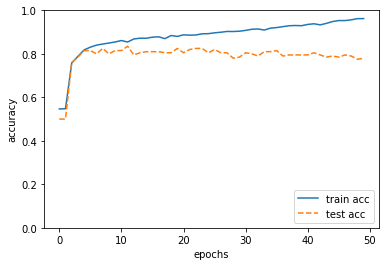

In [40]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()